# Hotel Booking Cancallation Prediction

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [15]:
# Load Data
file_path = 'hotel_bookings.csv'
data = pd.read_csv(file_path)

# Show the first five rows of the data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. Data Pre-processing (30%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

# Steps:
1. **Drop Irrelevant Columns**: removes irrelevant columns such as `agent`, `company`, and `dates`.
2. **Missing Values**: Missing values in the data were checked and removed. 
3. **Unique Values**: Each column was checked for unique values to help identify possible inconsistencies.
4. **Removing Inconsistent Values**: rows with zero adults and zero day or night stay.

In [16]:
# 1.1 Missing Values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
# Remove irrelevant columns like date, agent (NULL), company (NULL), and so on
columns_to_drop = ['agent', 'company', 'reservation_status_date', 'arrival_date_year',
                  'arrival_date_week_number', 'arrival_date_day_of_month']
data = data.drop(columns=columns_to_drop)

# Displays the name of remaining columns
print("Columns after dropping irrelevant columns:")
print(data.columns)

Columns after dropping irrelevant columns:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')


In [18]:
# remove the remaining missing values
data.isnull().sum()
ext_data = data.dropna(axis=0)
ext_data

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,August,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,August,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,August,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


## 1.2 Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [19]:
print("\nUnique values in each column:") 
for column in ext_data.columns:
    print(f"{column}: {ext_data[column].nunique()}")


Unique values in each column:
hotel: 2
is_canceled: 2
lead_time: 479
arrival_date_month: 12
stays_in_weekend_nights: 15
stays_in_week_nights: 33
adults: 14
children: 5
babies: 5
meal: 5
country: 177
market_segment: 7
distribution_channel: 5
is_repeated_guest: 2
previous_cancellations: 15
previous_bookings_not_canceled: 73
reserved_room_type: 10
assigned_room_type: 12
booking_changes: 21
deposit_type: 3
days_in_waiting_list: 128
customer_type: 4
adr: 8870
required_car_parking_spaces: 5
total_of_special_requests: 6
reservation_status: 3


# 1.3 Removing Inconsistent values

In [20]:
# Rule 1: Remove bookings with children or infants but no adult.
guests = ext_data[(ext_data['adults'] != 0)]
print("\nRemove bookings with zero adults:")
guests


Remove bookings with zero adults:


,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,August,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,August,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,August,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [21]:
# Rule 2: Check for record with weekend or weekday stayed equal 0
stays = guests[(guests['stays_in_weekend_nights'] != 0) + (guests['stays_in_week_nights'] != 0)]
stays

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
5,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
6,Resort Hotel,0,0,July,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,August,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,August,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,August,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


# 2. Exploratory Data Analysis (15%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.
* Identifying the most common customer types.

Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts

# Explanation

1. **Calculation of Cancellation Rate**: shows the cancellation rate of City and Resort hotels through a bar chart to help management understand the stability of bookings for both types of hotels.
2. **Types of food and beverage most frequently ordered**: Visualises the number of orders for different types of food and beverage through a bar chart, helping management to optimise the provision of food and beverage services.
3. **Number of Returning Guests**: a pie chart showing the percentage of returning guests, indicating that non-repeating guests are the main source of customers for hotels and that hotels may need more strategies to increase customer loyalty.
4. **Most Frequently Booked Room Types**: The bar chart shows the most frequently booked room types, helping the hotel to understand customers' room type preferences for room allocation optimisation.
5. **Correlation between room types and cancellations**: The bar chart shows the cancellation rates of different room types, and management can use this information to optimise room types and pricing strategies to reduce cancellation rates.
6. **Most common customer types**: Pie charts showing the proportion of different customer types help management understand the composition of customers and the corresponding market demand.
7. **Line Chart of Monthly Booking Changes**: shows the monthly booking trends throughout the year through line charts, helping hotels to identify peak and trough months for more effective resource planning and management.

Calculating cancellation percentages for City and Resort hotels.
--------------------------------------------------
0    0.626429
1    0.373571
Name: is_canceled, dtype: float64
--------------------------------------------------


<Axes: title={'center': 'Cancellation rate of City and Resort hotels'}>

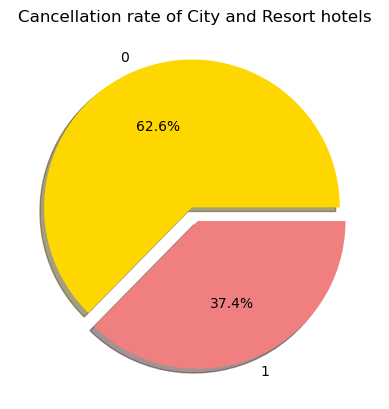

In [22]:
# 2.1 Calculated cancellation rate
print('Calculating cancellation percentages for City and Resort hotels.')
print('-'*50)

print(stays.is_canceled.value_counts(normalize=True))
print('-'*50)

cols = ['gold','lightcoral']
stays['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%', colors=cols, 
                                          shadow=True, explode=[0.05, 0.05], ylabel='',
                                    title='Cancellation rate of City and Resort hotels')


Most frequently ordered meal types:
BB           0.772604
HB           0.121758
SC           0.089068
Undefined    0.009808
FB           0.006762
Name: meal, dtype: float64


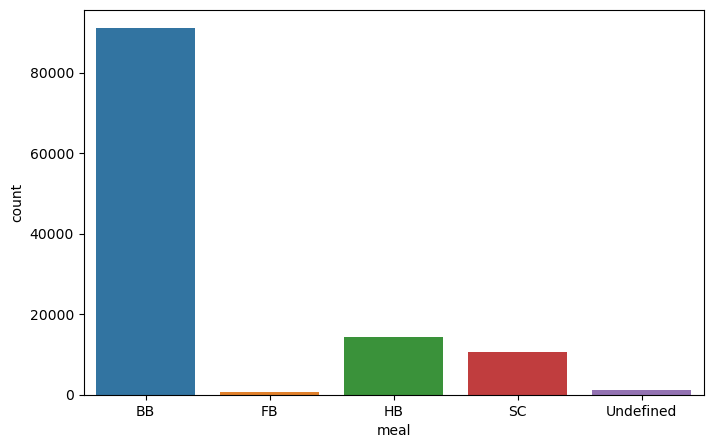

In [31]:
# 2.2 Identify the types of meals that are most commonly ordered
most_frequent_meals = stays['meal'].value_counts(normalize=True)
print("\nMost frequently ordered meal types:")
print(most_frequent_meals)

plt.figure(figsize=(8,5))
sns.countplot(data=stays, x='meal')
#sns.countplot(data=stays, x='meal', palette='Paired')
plt.show()


Number of returning guests:
0    0.970347
1    0.029653
Name: is_repeated_guest, dtype: float64


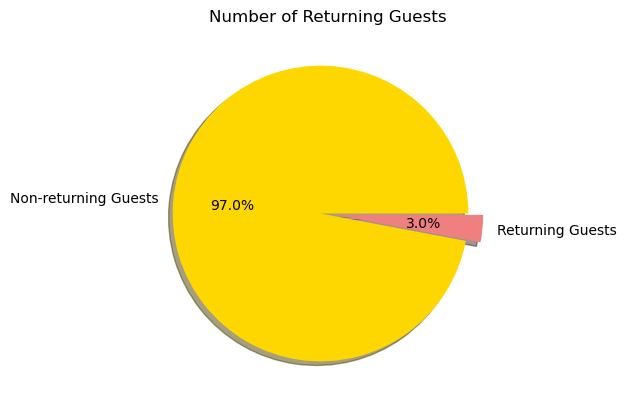

In [59]:
# 2.3 Number of Returning Guests

# Count repeat customers
returning_guests = stays['is_repeated_guest'].value_counts(normalize=True)
print("\nNumber of returning guests:")
print(returning_guests)

# Visualize repeat customers and non-repeat customers
cols = ['gold','lightcoral']
returning_guests.plot(kind='pie', labels=['Non-returning Guests', 'Returning Guests'], 
                      autopct='%1.1f%%', colors=cols, shadow=True, explode=[0.05, 0.05])
plt.title('Number of Returning Guests')
plt.ylabel('')
plt.show()


Most booked room types:
A    0.721164
D    0.161770
E    0.054664
F    0.024350
G    0.017495
C    0.007823
B    0.007619
H    0.005065
L    0.000051
Name: reserved_room_type, dtype: float64


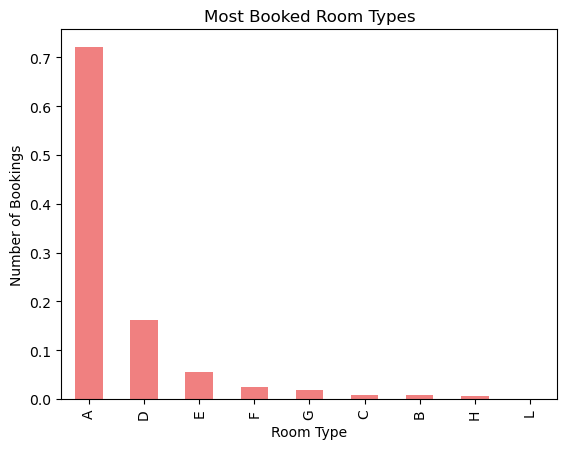

In [25]:
# 2.4 Most frequently booked room type

# Identify the most frequently booked room types
most_booked_room = stays['reserved_room_type'].value_counts(normalize=True)
print("\nMost booked room types:")
print(most_booked_room)

# Visualize the most frequently booked room types
most_booked_room.plot(kind='bar', color='lightcoral')
plt.title('Most Booked Room Types')
plt.ylabel('Number of Bookings')
plt.xlabel('Room Type')
plt.show()


Cancellation rate by room type:
reserved_room_type
A    39.476471
B    31.291759
C    33.297180
D    31.976714
E    29.520410
F    30.662021
G    36.954413
H    41.038526
L    33.333333
Name: is_canceled, dtype: float64


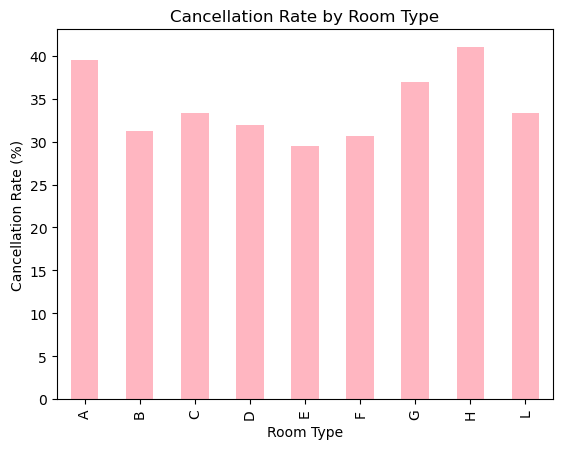

In [26]:
# 2.5 Explore the correlation between room types and cancellations

# Calculate cancellation rates for different room types
room_cancellation = stays.groupby('reserved_room_type')['is_canceled'].mean() * 100
print("\nCancellation rate by room type:")
print(room_cancellation)

# Visualize room types and cancellation rates
room_cancellation.plot(kind='bar', color='lightpink')
plt.title('Cancellation Rate by Room Type')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Room Type')
plt.show()


Most common customer types:
Transient          88371
Transient-Party    24877
Contract            4055
Group                562
Name: customer_type, dtype: int64


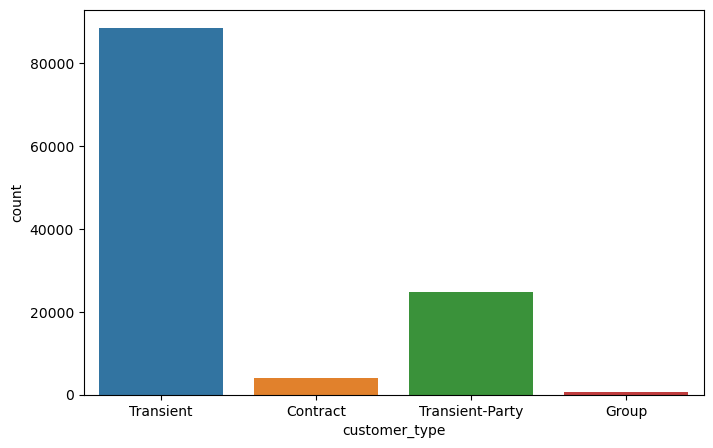

In [32]:
# 2.6 Most common types of customers

most_common_customer_type = stays['customer_type'].value_counts()
print("\nMost common customer types:")
print(most_common_customer_type)

# Visualize the most common types of customers
plt.figure(figsize=(8,5))
sns.countplot(data=stays, x='customer_type')
#sns.countplot(data=stays, x='meal', palette='Paired')
plt.show()

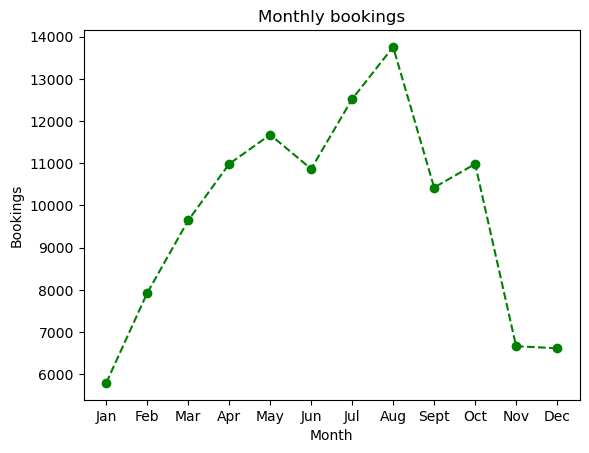

In [60]:
stays2 = pd.DataFrame()

dictn={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 
      'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
      'November':11, 'December':12}
stays2['arrival_date_month'] = stays['arrival_date_month'].map(dictn)

monthly_bookings = stays2.groupby('arrival_date_month', sort=True).size()

plt.plot(monthly_bookings.index, monthly_bookings.values, marker='o', linestyle='dashed', color='green')
plt.title('Monthly bookings')
plt.xlabel('Month')
plt.ylabel('Bookings')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()

# 3. Feature Engineering (25%)


---





Apply various feature engineering techniques, covered in the lectures and practicles.

Hint:

* Binning
* Encoding
* **Outlier identification and handling**
* Variance, Covariance, Correlation, Correlation Heapmap
* Scaling

In Part III, I will apply some feature engineering techniques, including the following steps:

1. **Binning**: binning continuous variables, e.g. dividing advance booking time (`lead_time`) into different intervals.
2. **Encoding**: encoding of categorical variables, e.g. converting categorical data such as `hotel`, `meal` etc. to numerical data (one-hot encoding or label encoding).
3. **Outlier Identification and Handling**: identifying and handling outliers to ensure that the model is not affected by extreme values.
4. **Variance, Covariance, Correlation**: Calculate variance, covariance, and correlation between features and visualise them using correlation heatmaps.
5. **Scaling**: scales numerical features so that the features take a consistent range of values.



### Explanation

1. **Binning**: I divide `lead_time` into different time intervals so that discretisation of features helps in model processing.
2. **Encoding**: one-hot coding of category variables (e.g., hotel type, restaurant type) so that they can be input into the model. 3.
3. **Outlier Identification and Handling**: detect outliers of `adr` using box-and-line plots, and eliminate outliers greater than a certain threshold.
4. **Variance, Covariance, Correlation**: analyses the correlation between features by calculating the correlation matrix and generating a heat map.
5. **Scaling**: normalises the numerical features to ensure they have the same scale in the model.

In [ ]:
### 3.1 Binning

# Split the bins for ‘lead_time’
bins = [0, 30, 90, 180, 365, 1000] # Define bins intervals
labels = ['0-30 days', '31-90 days', '91-180 days', '181-365 days', 'more than 365 days ']
data['lead_time_binned'] = pd.cut(data['lead_time'], bins=bins, labels=labels)

# Check the binning results
print(data[['lead_time', 'lead_time_binned']].head())


   lead_time lead_time_binned
2          7        0-30 days
3         13        0-30 days
4         14        0-30 days
5         14        0-30 days
6          0              NaN


In [ ]:
### 3.2 Encoding

# Use one-time coding to code categorical data
categorical_columns = [ 'hotel’, ‘meal’, ‘market_segment’, ‘distribution_channel’,
'reserved_room_type', 'customer_type']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the encoded dataset
print(data_encoded.head())


   is_canceled  lead_time  arrival_date_year  arrival_date_month  \
2            0          7               2015                   7   
3            0         13               2015                   7   
4            0         14               2015                   7   
5            0         14               2015                   7   
6            0          0               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
2                        0                     1       1       0.0  ...   
3                        0                     1       1       0.0  ...   
4                

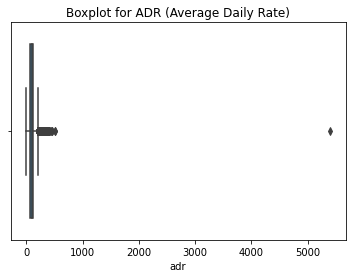

Data size after outlier removal: (114205, 29)


In [ ]:
### 3.3 Outlier Identification and Handling

import seaborn as sns

# Use box plots to identify outliers in columns of values, e.g. ‘adr’ (average daily rate)
sns.boxplot(x=data['adr'])
plt.title('Boxplot for ADR (Average Daily Rate)')
plt.show()

# Handling outliers, assuming we consider values greater than the 99th percentile to be outliers
Q1 = data['adr'].quantile(0.25)
Q3 = data['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removal of outliers
data_outliers_removed = data[(data['adr'] >= lower_bound) & (data['adr'] <= upper_bound)]
print(f"Data size after outlier removal: {data_outliers_removed.shape}")


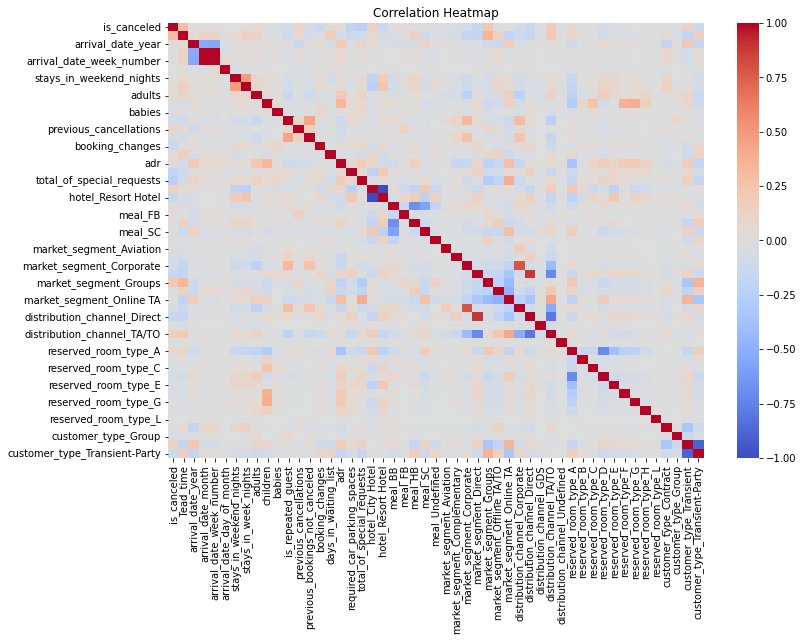

In [ ]:
### 3.4 Variance, Covariance, Correlation, Correlation Heapmap

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Heat mapping of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
### 3.5 Scaling

from sklearn.preprocessing import StandardScaler

# Select the numerical features to be scaled
numeric_features = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']

# Normalisation of numerical features
scaler = StandardScaler()
data_scaled = data_encoded.copy()
data_scaled[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

# Display of scaled data
print(data_scaled[numeric_features].head())

   lead_time       adr  stays_in_weekend_nights  stays_in_week_nights  \
2  -0.914381 -0.554182                -0.939874             -0.803359   
3  -0.858282 -0.554182                -0.939874             -0.803359   
4  -0.848932 -0.093814                -0.939874             -0.272904   
5  -0.848932 -0.093814                -0.939874             -0.272904   
6  -0.979829  0.086329                -0.939874             -0.272904   

     adults  children    babies  
2 -1.498938 -0.261453 -0.081645  
3 -1.498938 -0.261453 -0.081645  
4  0.240308 -0.261453 -0.081645  
5  0.240308 -0.261453 -0.081645  
6  0.240308 -0.261453 -0.081645  


### 1. **Binning analysis**
I have binned `lead_time` (advance booking time).
Binning helps to convert continuous variables into categorical variables, which may help the model to better capture booking behaviour in different time intervals.
The binning results show that the majority of the data falls within the `0-30 days` interval. This suggests that most of the customers' bookings are more ad hoc, usually less than a month in advance. Such a pattern is related to the customers' habits or the hotel's marketing strategy.

### 2. **Encoding (coding) analyses**
One-hot coding was performed on all category variables such as `hotel`, `meal`, `market_segment`, `distribution_channel`, `reserved_room_type`, `customer_type` and so on.

**Analysis of coding results**:
Multiple feature columns were added to the dataset after coding, such as `customer_type_Transient`, `customer_type_Group` etc. Converting category type data to numeric type through coding enables the machine learning model to better handle this type of data.

### 3. **Outlier Identification and Handling**
A box plot was used to detect outliers in `adr` (average daily house price) and remove outliers that were outside the normal range.

**Analysis**:
As can be seen from the box-and-line plot, there are significant outliers in `adr`, especially with some extreme values (e.g., house prices over 5000). These anomalies could be due to a very few special cases, such as luxury suite bookings. The outliers were removed by using the IQR method (interquartile range) and the size of the dataset after processing was 114,205 records, which indicates that some of the extreme values were successfully removed.
Removing outliers helps to avoid the model from being affected by noisy data, thus improving the prediction accuracy.

### 4. **Correlation Heatmap**
I also generated a correlation heatmap between features to help understand the relationship between features.

**Analysis**:
The heatmap shows the correlation between features. Dark red colour indicates highly positive correlation and dark blue colour indicates highly negative correlation.
From the heatmap, it can be seen that `is_canceled` (booking cancellation) has a strong positive or negative correlation with some features such as `previous_cancellations` and `lead_time`. This suggests that these features may be important in predicting cancellation behaviour.
Similarly, I believe that there is little to no correlation between certain features (coloured close to white), and that these features may not contribute much in the model and could be considered for removal in further feature selection.

### 5. **Scaling**
Numerical features (e.g. `lead_time`, `adr`, `stays_in_weekend_nights`, etc.) are normalised to ensure they have a consistent range of values in the model.

**Analysis**:
Normalised data is very helpful for many machine learning algorithms (e.g. linear models, SVMs, etc.) which are very sensitive to the magnitude of the features.
By normalising the numerical features, the model can converge faster and avoid certain features having too much influence on the model training.

# 4. Classifier Training (20%)


---


Utilize the sklearn Python library to train a decision tree classifier. Your process should start with splitting your dataset into predictor features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train and test your data on the original dataset, a normalized dataset, and a standardized dataset. Aim to achieve a decision tree classifier with at least 70% accuracy.

Part 4: **Classifier Training**.
I will use `sklearn` to train a decision tree classifier:
1. **Data Segmentation**: Segment the dataset into a feature set (`X`) and a target variable (`y`), and then divide the dataset into a 70% training set and a 30% testing set.
2. **Training model**: train the decision tree model on the original dataset, normalised dataset, and normalised dataset respectively.
3. **Evaluation model**: ensure that the decision tree classifier is at least 70% accurate.


### Explanation:
1. **Data Set Split**: use the `train_test_split` function to split the data set into a training set and a test set at 70% and 30%.
2. **Decision Tree Classifier**: `DecisionTreeClassifier` is used as a model and trained on raw, normalised and normalised data respectively.
3. **Evaluating the models**: the accuracy of each model on the test set is evaluated by `accuracy_score`. The goal is to achieve at least 70% accuracy.

In [ ]:
### Import packages and import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Selection of target variable (y) and characteristic variable (X)

# One-hot coding of all categorical data
data_encoded = pd.get_dummies(data_encoded)

# Selection of target variable (y) and characteristic variable (X)
X = data_encoded.drop('is_canceled', axis=1)  # feature set
y = data_encoded['is_canceled']  # target variable

In [ ]:
# Data set partitioning (70% training set, 30% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Decision tree classifiers on the original dataset
clf_original = DecisionTreeClassifier(random_state=42)
clf_original.fit(X_train, y_train)

# Forecasting and evaluating models
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy on original dataset: {accuracy_original * 100:.2f}%")

Accuracy on original dataset: 84.79%


In [ ]:
# Decision tree classifiers on standardised datasets
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

clf_standard = DecisionTreeClassifier(random_state=42)
clf_standard.fit(X_train_standard, y_train)

y_pred_standard = clf_standard.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
print(f"Accuracy on standardized dataset: {accuracy_standard * 100:.2f}%")

Accuracy on standardized dataset: 84.77%


In [ ]:
# Decision tree classifiers on normalised datasets
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

clf_minmax = DecisionTreeClassifier(random_state=42)
clf_minmax.fit(X_train_minmax, y_train)

y_pred_minmax = clf_minmax.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)
print(f"Accuracy on normalized dataset: {accuracy_minmax * 100:.2f}%")

Accuracy on normalized dataset: 84.79%


# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

**In order to understand and evaluate the trained decision tree model, I first need to extract the importance scores of the features from the model. This step helps me to quantify how much each feature contributes to predicting the target variable. Immediately after that, I will rank these features according to their importance and visualise them by generating bar charts, which not only presents the importance of each feature visually but also facilitates further analysis. Having obtained the importance ranking of the features and their visualisation results, I can comment on the reliability of the model's results based on this information. Specifically, it is possible to identify those features that have the greatest impact on the model predictions and explore whether they reasonably influence the model's performance, thereby assessing the overall reliability and applicability of the model.**

### Explanation:
**The importance scores for each feature in the model should first be extracted using clf_original.feature_importances_. Subsequently, all features are ranked according to these importance scores and special attention is paid to the top ten most important features, which are visualised in the form of bar charts in order to give a more intuitive picture of the level of influence of each feature. Finally, by looking at these key features, especially those that are logically related to the problem like lead_time and previous_cancellations, we can assess the reliability of the model's predictions. If it is found that there is indeed a strong correlation between the most important features in the model and the problem it is expected to solve, the results of the model can be considered to be highly reliable.**


Top 10 important features:
                       Feature  Importance
239    deposit_type_Non Refund    0.235555
0                    lead_time    0.107612
15                         adr    0.068384
31    market_segment_Online TA    0.061240
17   total_of_special_requests    0.054624
4    arrival_date_day_of_month    0.053941
3     arrival_date_week_number    0.045584
185                country_PRT    0.043075
1            arrival_date_year    0.030011
6         stays_in_week_nights    0.028098


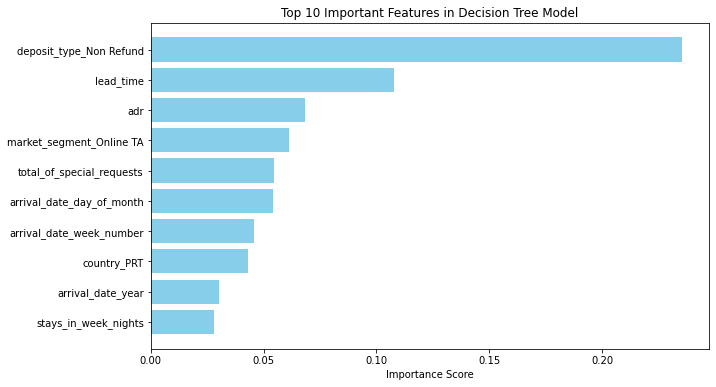

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Importance of extracting features from the original dataset model
feature_importances = clf_original.feature_importances_

# Pair feature names with their corresponding importance
features = X.columns
importance_scores = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort in order of importance
importance_scores = importance_scores.sort_values(by='Importance', ascending=False)

# Print the top 10 important features
print("\nTop 10 important features:")
print(importance_scores.head(10))

# Importance of visual features
plt.figure(figsize=(10, 6))
plt.barh(importance_scores['Feature'][:10], importance_scores['Importance'][:10], color='skyblue')
plt.title('Top 10 Important Features in Decision Tree Model')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis() # inverts the Y-axis so that the most important features are displayed at the top
plt.show()

###1. **Top 10 feature analysis**:
According to the output, the most significant feature is `deposit_type_Non Refund` with a significance score of 0.2355. this indicates that the setting of non-refundable deposit has the greatest impact on booking cancellation. Also `lead_time` (advance booking time) and `adr` (average daily rate) have a significant effect on cancellations.

Top 10 significant features:
1. `deposit_type_Non Refund` (significance: 0.2355) - Non-Refundable Deposits: this feature is the most important in the model, which is logical as non-refundable deposits tend to make customers less likely to cancel a booking.
2. `lead_time` (Importance: 0.1076) - early booking time: the longer the early booking time, the higher the risk of a possible cancellation, as the customer has more time to change plans.
3. `adr` (Importance: 0.0684) - average_rate_per_day: bookings with higher rates are likely to have a lower cancellation rate, as customers are likely to be more cautious in their decision to book at higher rates.
4. `market_segment_Online TA` (Importance: 0.0616) - online travel agent market: bookings made through online agents may have a different cancellation rate than other channels.
5. `total_of_special_requests` (Importance: 0.0546) - number of special requests: the number of special requests may reflect the importance that customers place on bookings.
6. `arrival_date_day_of_month` (Importance: 0.0539) - Arrival date: bookings made on a specific date may be affected by seasonality, which is related to the cancellation rate.
7. `arrival_date_week_number` (Importance: 0.0456) - Arrival week number: bookings for a specific date may be affected by seasonality, which is related to the cancellation rate pattern for a specific time period.
8. `country_PRT` (Importance: 0.0431) - country/region: booking cancellation rates in Portugal may behave differently than in other countries.
9. `arrival_date_year` (Importance: 0.0300) - arrival_year: the year may also be correlated with cancellation rates, possibly due to the economic or travel environment of certain specific years.
10. `stays_in_week_nights` (Importance: 0.0281) - number of nights stayed on weekdays: may be related to the customer's planning flexibility, which in turn affects the likelihood of cancellations.

### 2. **Reliability analysis of model results**:
As can be seen from these features, most of the features considered important by the model are highly correlated with logical booking cancellation behaviour.
For example, the significance of `deposit_type_Non Refund` is evident, with the non-refund policy reducing the likelihood of cancellation. `lead_time` and `adr` are also features that are strongly correlated with cancellation behaviour, with longer advance bookings implying more chances of a change of plans, and bookings with higher room rates typically being more stable.

Therefore, based on these results, it can be inferred that the predictive power of the model is more reliable. The important features are in line with the real-life patterns of cancellation behaviour and the model is able to capture the important factors that determine cancellation, which indicates that the decision tree model I have constructed is able to effectively handle the task of predicting hotel booking cancellations.

